Importing Packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import statistics
#import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns

loading training dataset

In [ ]:
df = pd.read_csv("dataset.csv")
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


symptom severity dataset
(this dataset basically contains the weights of each symptom)

In [ ]:
data_severity = pd.read_csv("Symptom-severity.csv")

data_severity.shape
data_severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  136 non-null    object
 1   weight   136 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
data_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


Changes in dataset
(Basically earsig leading and trailing whitespaces,&
putting _ in between whitespaces )

In [ ]:
def remove_space_between_words(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip().str.replace(" ", "_")
    return df

In [ ]:
df = remove_space_between_words(df)

In [ ]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal_infection,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal_infection,itching,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal_infection,itching,skin_rash,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replacing the symptoms in the datasets with their weights & replacing the NaN values with 0

In [ ]:
def encode_symptoms(data, data_severity):
    for i in data_severity.index:
        symptom = data_severity["Symptom"][i]
        weight = data_severity["weight"][i]
        data = data.replace(symptom, weight)

    # Replace missing values with 0
    data = data.fillna(0)



    return data

In [ ]:
data = encode_symptoms(df, data_severity)

<ipython-input-9-340f79fa88b4>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(symptom, weight)


In [ ]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,1,3,4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Fungal_infection,3,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal_infection,1,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fungal_infection,1,3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Fungal_infection,1,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     4920 non-null   object 
 1   Symptom_1   4920 non-null   int64  
 2   Symptom_2   4920 non-null   int64  
 3   Symptom_3   4920 non-null   int64  
 4   Symptom_4   4920 non-null   float64
 5   Symptom_5   4920 non-null   float64
 6   Symptom_6   4920 non-null   float64
 7   Symptom_7   4920 non-null   float64
 8   Symptom_8   4920 non-null   float64
 9   Symptom_9   4920 non-null   float64
 10  Symptom_10  4920 non-null   float64
 11  Symptom_11  4920 non-null   float64
 12  Symptom_12  4920 non-null   float64
 13  Symptom_13  4920 non-null   float64
 14  Symptom_14  4920 non-null   float64
 15  Symptom_15  4920 non-null   float64
 16  Symptom_16  4920 non-null   float64
 17  Symptom_17  4920 non-null   float64
dtypes: float64(14), int64(3), object(1)
memory usage: 692.0+ KB


In [ ]:
# separating the data and labels
X = data.drop(columns='Disease', axis=1)
Y = data['Disease']

In [ ]:
x_before=X
y_before=Y

print(x_before)
print(y_before)

[[-1.83180372 -0.96557578 -0.13863618 ... -0.21790657 -0.18978799
  -0.12186667]
 [-0.3122498  -0.13736225  1.46251409 ... -0.21790657 -0.18978799
  -0.12186667]
 [-1.83180372 -0.13736225  1.46251409 ... -0.21790657 -0.18978799
  -0.12186667]
 ...
 [ 1.96708109 -0.13736225  0.66193895 ... -0.21790657 -0.18978799
  -0.12186667]
 [-0.3122498  -0.96557578 -0.93921132 ... -0.21790657 -0.18978799
  -0.12186667]
 [-0.3122498   2.34727837 -0.13863618 ... -0.21790657 -0.18978799
  -0.12186667]]
0                              Fungal_infection
1                              Fungal_infection
2                              Fungal_infection
3                              Fungal_infection
4                              Fungal_infection
                         ...                   
4915    (vertigo)_Paroymsal__Positional_Vertigo
4916                                       Acne
4917                    Urinary_tract_infection
4918                                  Psoriasis
4919                        

# Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[-1.83180372 -0.96557578 -0.13863618 ... -0.21790657 -0.18978799
  -0.12186667]
 [-0.3122498  -0.13736225  1.46251409 ... -0.21790657 -0.18978799
  -0.12186667]
 [-1.83180372 -0.13736225  1.46251409 ... -0.21790657 -0.18978799
  -0.12186667]
 ...
 [ 1.96708109 -0.13736225  0.66193895 ... -0.21790657 -0.18978799
  -0.12186667]
 [-0.3122498  -0.96557578 -0.93921132 ... -0.21790657 -0.18978799
  -0.12186667]
 [-0.3122498   2.34727837 -0.13863618 ... -0.21790657 -0.18978799
  -0.12186667]]


In [ ]:
X = standardized_data

In [ ]:
print(X)
print(Y)

[[-1.83180372 -0.96557578 -0.13863618 ... -0.21790657 -0.18978799
  -0.12186667]
 [-0.3122498  -0.13736225  1.46251409 ... -0.21790657 -0.18978799
  -0.12186667]
 [-1.83180372 -0.13736225  1.46251409 ... -0.21790657 -0.18978799
  -0.12186667]
 ...
 [ 1.96708109 -0.13736225  0.66193895 ... -0.21790657 -0.18978799
  -0.12186667]
 [-0.3122498  -0.96557578 -0.93921132 ... -0.21790657 -0.18978799
  -0.12186667]
 [-0.3122498   2.34727837 -0.13863618 ... -0.21790657 -0.18978799
  -0.12186667]]
0                              Fungal_infection
1                              Fungal_infection
2                              Fungal_infection
3                              Fungal_infection
4                              Fungal_infection
                         ...                   
4915    (vertigo)_Paroymsal__Positional_Vertigo
4916                                       Acne
4917                    Urinary_tract_infection
4918                                  Psoriasis
4919                        

In [ ]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, Y):
    return f1_score(Y, estimator.predict(X), average='macro')

# Initializing Models
models = {
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(random_state=18),
    "Gaussian Naive Bayes Classifier":GaussianNB(),
    "Support Vector Classifier":SVC(),
}

# Producing cross validation score for the models

print(f"Means score obtained from 5 folds")
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, Y, cv = 5,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"F1 Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

print("=="*30)
print("=="*30)
print("=="*30)
print(f"Means score obtained from 10 folds")
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, Y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"F1 Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

Means score obtained from 5 folds
Decision Tree Classifier
F1 Scores: [0.98652965 0.98237542 0.99387086 1.         1.        ]
Mean Score: 0.9925551875778543
Random Forest Classifier
F1 Scores: [0.98652965 0.98296338 0.99389033 1.         1.        ]
Mean Score: 0.9926766731324659
Gaussian Naive Bayes Classifier
F1 Scores: [0.79407973 0.82068234 0.87556984 0.93495935 0.93495935]
Mean Score: 0.8720501205824842
Support Vector Classifier
F1 Scores: [0.90870591 0.91676141 0.96431515 1.         1.        ]
Mean Score: 0.9579564925485865
Means score obtained from 10 folds
Decision Tree Classifier
F1 Scores: [0.98575814 0.98540673 0.97981806 0.98335557 0.98763431 1.
 1.         1.         1.         1.        ]
Mean Score: 0.9921972818038565
Random Forest Classifier
F1 Scores: [0.98582965 0.98540673 0.97981806 0.98335557 0.98792219 1.
 1.         1.         1.         1.        ]
Mean Score: 0.992233221120814
Gaussian Naive Bayes Classifier
F1 Scores: [0.82190359 0.79494654 0.82095156 0.81218

# Performance Matrix for each Model

Performance Metrics for Each Model(WITH DATA STANDARDIZATION):
           Model  Precision    Recall  F1 Score  Accuracy
0   DecisionTree   0.992801  0.990976  0.991456  0.991870
1  Random Forest   0.992801  0.990976  0.991456  0.991870
2    Naive Bayes   0.879477  0.873324  0.862851  0.867886
3            SVM   0.960272  0.953164  0.953150  0.957317
Performance Metrics for Each Model(WITHOUT DATA STANDARDIZATION):
           Model  Precision    Recall  F1 Score  Accuracy
0   DecisionTree   0.992801  0.990976  0.991456  0.991870
1  Random Forest   0.992801  0.990976  0.991456  0.991870
2    Naive Bayes   0.879477  0.873324  0.862851  0.867886
3            SVM   0.960272  0.953164  0.953150  0.957317


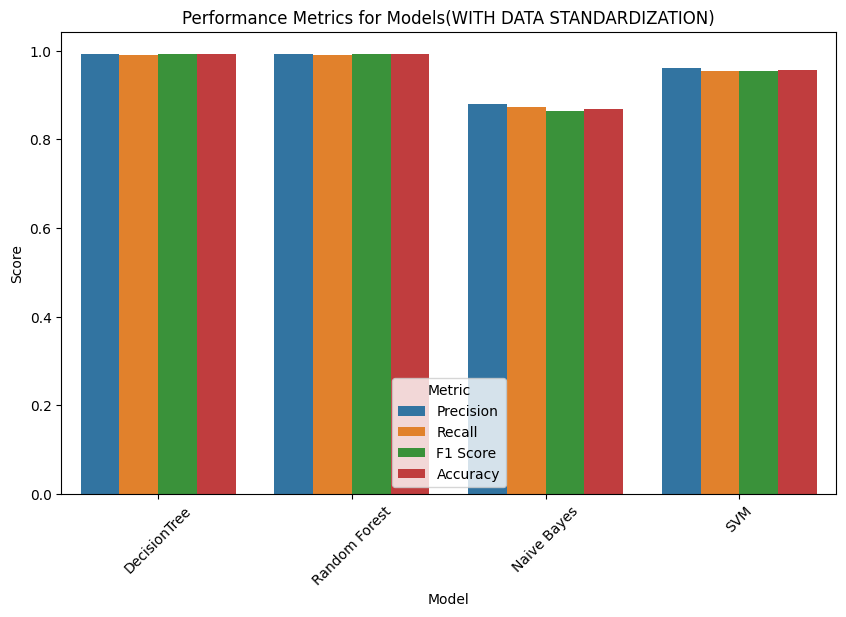

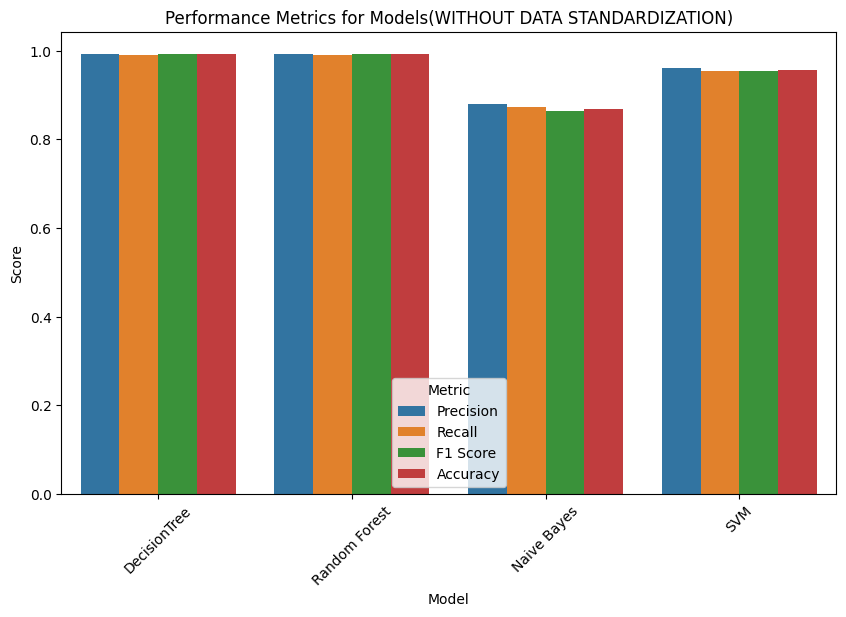

In [ ]:
# Define models to evaluate
models = {
    "DecisionTree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
}

# Train the models and get predictions (added this part)
trained_models = {}  # Store trained models here

# Initialize list to store results

# WITH DATA STANDARDIZATION
results = []
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    preds = model.predict(X_test)  # Predict on test data
    trained_models[model_name] = model  # Store the trained model

    # Compute metrics

    precision = precision_score(y_test, preds, average='macro' )
    recall = recall_score(y_test, preds, average='macro' )
    f1 = f1_score(y_test, preds, average='macro' )
    accuracy = accuracy_score(y_test, preds)


    # Append results
    results.append([model_name, precision, recall, f1, accuracy])


# WITHOUT DATA STANDARDIZATION
results2 = []
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_before, y_before, test_size=0.2, random_state=42)
# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train2, y_train2)  # Train the model
    preds2 = model.predict(X_test2)  # Predict on test data
    trained_models[model_name] = model  # Store the trained model

    # Compute metrics

    precision = precision_score(y_test2, preds2, average='macro' )
    recall = recall_score(y_test2, preds2, average='macro' )
    f1 = f1_score(y_test2, preds2, average='macro' )
    accuracy = accuracy_score(y_test2, preds2)


    # Append results
    results2.append([model_name, precision, recall, f1, accuracy])


# Create a DataFrame to display results
results_df = pd.DataFrame(results, columns=["Model", "Precision", "Recall", "F1 Score", "Accuracy"])

results_df2 = pd.DataFrame(results2, columns=["Model", "Precision", "Recall", "F1 Score", "Accuracy"])
# Display the results as a table
print("Performance Metrics for Each Model(WITH DATA STANDARDIZATION):")
print(results_df)
print("=======================================================================================================")
print("Performance Metrics for Each Model(WITHOUT DATA STANDARDIZATION):")
print(results_df2)

# Optional: Visualize results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric")
plt.title("Performance Metrics for Models(WITH DATA STANDARDIZATION)")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=results_df2.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric")
plt.title("Performance Metrics for Models(WITHOUT DATA STANDARDIZATION)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install seaborn matplotlib scikit-learn

# Confusion Matrix for each Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


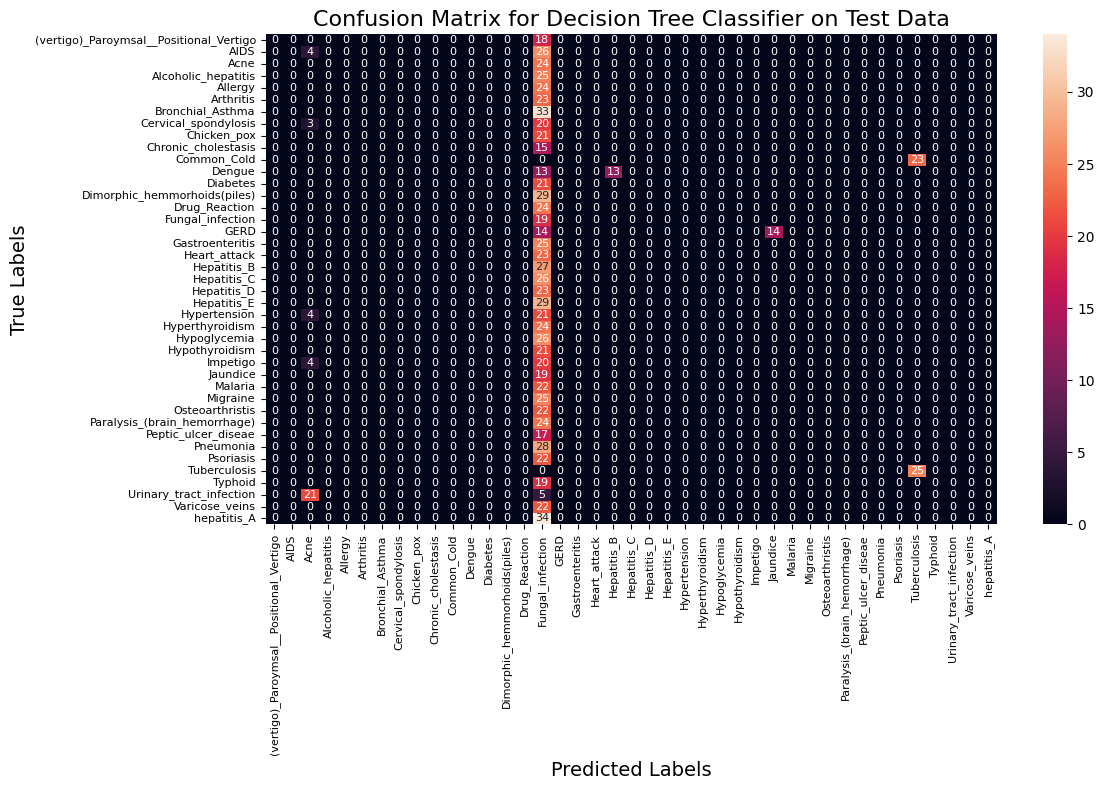

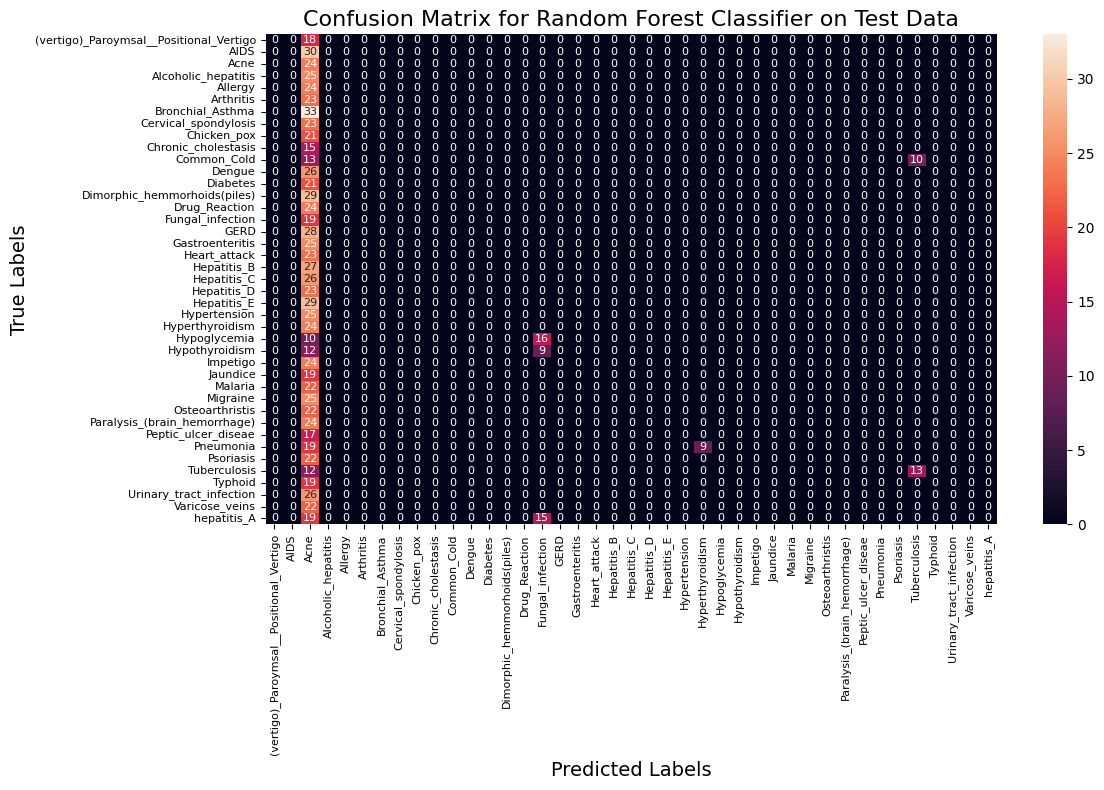

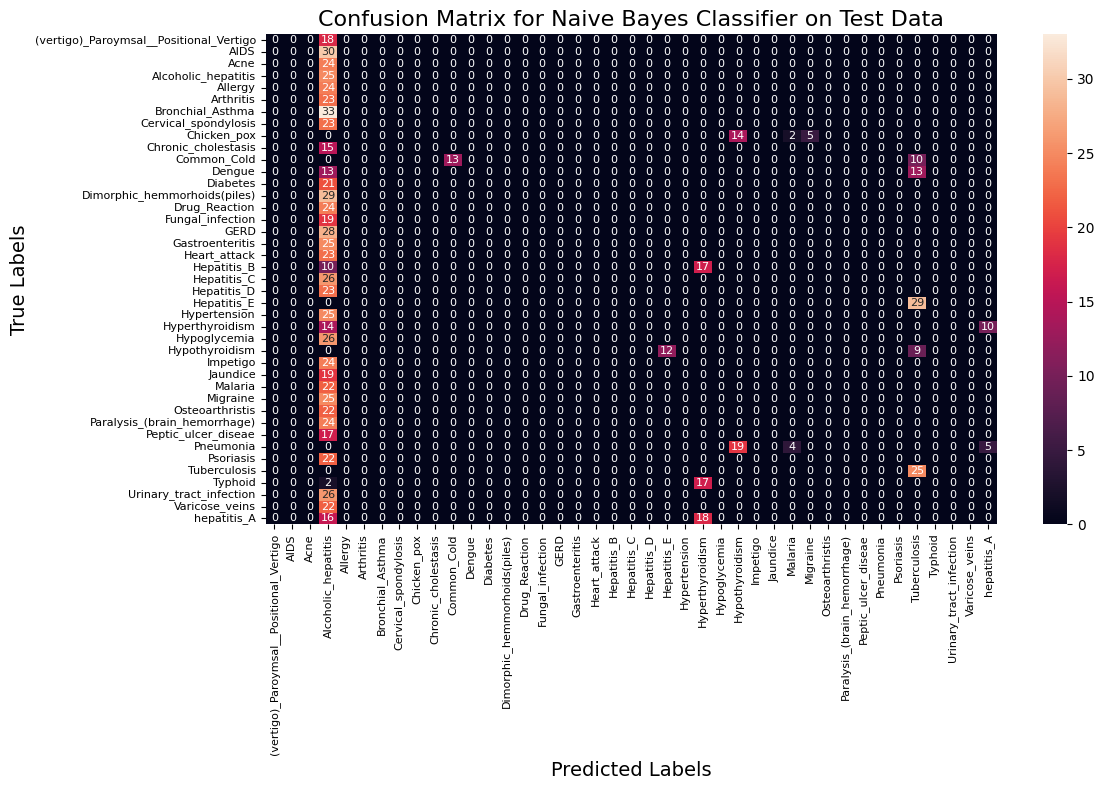

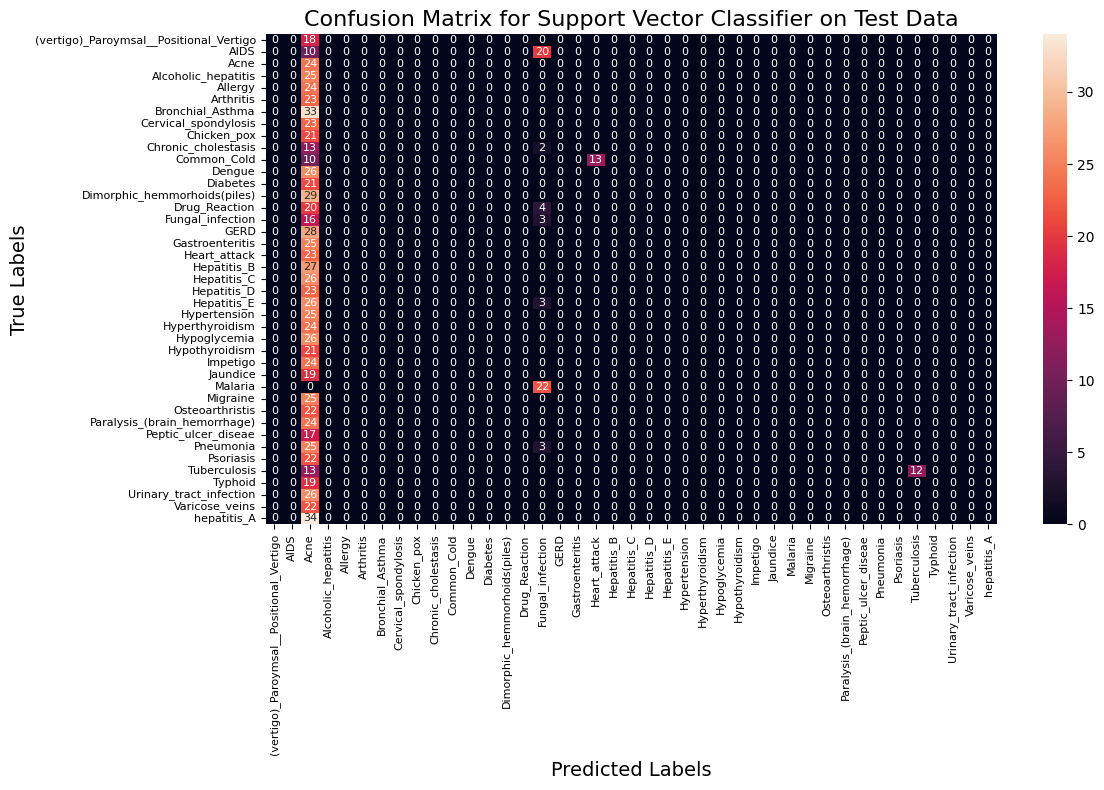

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder



# Create a LabelEncoder if you don't have one
encoder = LabelEncoder()
encoder.fit(y_test) # or encoder.fit(Y) if y_test isn't available

# Function to plot confusion matrix as heatmap
def plot_confusion_matrix(y_true, y_pred, model_name):
    cf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True, fmt="d",
                xticklabels=encoder.classes_, yticklabels=encoder.classes_,
                annot_kws={"size": 8})
    # sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name} on Test Data", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plt.show()



# Make predictions on the test data using trained models from the 'trained_models' dictionary
decision_tree_preds = trained_models["DecisionTree"].predict(X_test)  # Access using key "DecisionTree"
rf_preds = trained_models["Random Forest"].predict(X_test)       # Access using key "Random Forest"
nb_preds = trained_models["Naive Bayes"].predict(X_test)         # Access using key "Naive Bayes"
svm_preds = trained_models["SVM"].predict(X_test)                 # Access using key "SVM"

# Plot confusion matrices for individual models
plot_confusion_matrix(y_test, decision_tree_preds, "Decision Tree Classifier")
plot_confusion_matrix(y_test, rf_preds, "Random Forest Classifier")
plot_confusion_matrix(y_test, nb_preds, "Naive Bayes Classifier")
plot_confusion_matrix(y_test, svm_preds, "Support Vector Classifier")





# Performance Matrix & Confusion Matrix for Combined results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Combined Model Performance:
Accuracy: 0.0528
F1-score: 0.0333
Precision: 0.0396
Recall: 0.0537
Confusion Matrix for Combined Model:


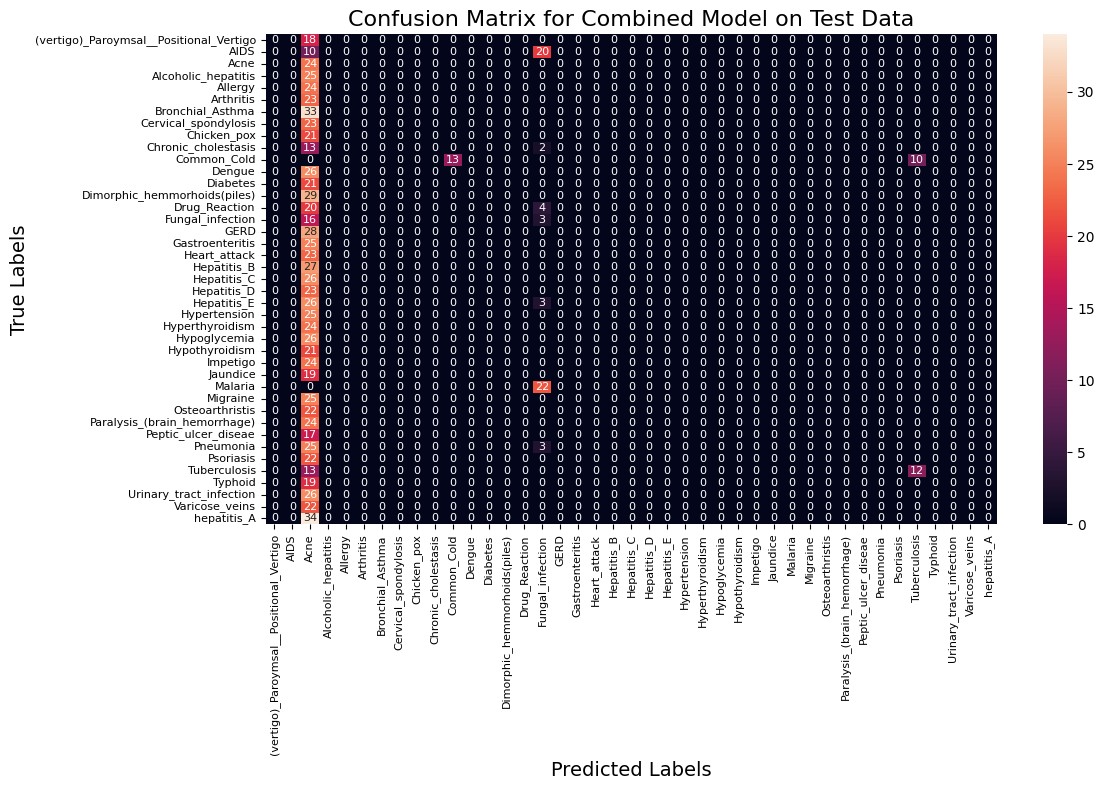

In [ ]:
# Combine predictions using majority voting and plot confusion matrix
combined_preds = []
for i in range(len(y_test)):
    model_predictions = [decision_tree_preds[i], rf_preds[i], nb_preds[i], svm_preds[i]]
    numerical_predictions = [encoder.transform([pred])[0] for pred in model_predictions]
    combined_preds.append(encoder.inverse_transform([np.bincount(numerical_predictions).argmax()])[0])




# Calculate Accuracy
accuracy = accuracy_score(y_test, combined_preds)

# Calculate F1-score
f1 = f1_score(y_test, combined_preds, average='macro')  # Use 'macro' for multi-class

# Calculate precision
precision = precision_score(y_test, combined_preds, average='macro')

# Calculate recall
recall = recall_score(y_test, combined_preds, average='macro')

# Print the results
print("Combined Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("Confusion Matrix for Combined Model:")
plot_confusion_matrix(y_test, combined_preds, "Combined Model")

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics # Use statistics.mode instead of scipy.stats.mode
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Assuming 'data' and 'encoder' are already defined from previous code
# ...

# Creating a symptom index dictionary to encode the input symptoms into numerical form

#symptoms = data.columns.values[:-1]  # Exclude 'prognosis' column
#symptoms = df.columns.values[:-1]
symptoms = data.columns.values[1:]  # Exclude 'Disease' column, start from index 1
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index


# Fit the encoder on the unique disease classes in your training data
encoder.fit(data['Disease'])


data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    input_data = [0] * len(data_dict["symptom_index"])

    # for symptom in symptoms:
    #     try:
    #         index = data_dict["symptom_index"][symptom.strip()]  # Strip whitespace
    #         input_data[index] = 1
    #     except KeyError:
    #         print(f"Warning: Symptom '{symptom.strip()}' not found in the symptom index.")
    #         # Optionally, you could return an error message here

    for symptom in symptoms:
        symptom = symptom.strip()  # Strip whitespace before checking for the symptom
        if symptom in data_dict["symptom_index"]:  # Check if the symptom is in the index
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
        else:
            print(f"Warning: Symptom '{symptom}' not found in the symptom index.")
            # Optionally, you could return an error message here

    # reshaping the input data and converting it into suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][trained_models["Random Forest"].predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][trained_models["Naive Bayes"].predict(input_data)[0]]
    decision_tree_prediction = data_dict["predictions_classes"][trained_models["DecisionTree"].predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][trained_models["SVM"].predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    final_prediction = statistics.mode([rf_prediction, nb_prediction, decision_tree_prediction, svm_prediction])  # Use statistics.mode
    predictions = {
        "decision_tree_model_prediction": decision_tree_prediction,
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions

# Get symptoms from user
user_symptoms = input("Enter symptoms separated by commas (e.g., Itching,Skin Rash,Nodal Skin Eruptions): ")

# Make predictions
predictions = predictDisease(user_symptoms)

# Print predictions from each model
print("\nPredictions:")
for model_name, prediction in predictions.items():
    print(f"{model_name}: {prediction}")

Enter symptoms separated by commas (e.g., Itching,Skin Rash,Nodal Skin Eruptions): 3,5,4


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics # Use statistics.mode instead of scipy.stats.mode
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr


# Assuming 'data' and 'encoder' are already defined from previous code
# ...

# Creating a symptom index dictionary to encode the input symptoms into numerical form
symptoms = data.columns.values[:-1]  # Exclude 'prognosis' column
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    input_data = [0] * len(data_dict["symptom_index"])

    for symptom in symptoms:
        try:
            index = data_dict["symptom_index"][symptom.strip()]  # Strip whitespace
            input_data[index] = 1
        except KeyError:
            print(f"Warning: Symptom '{symptom.strip()}' not found in the symptom index.")
            # Optionally, you could return an error message here

    # reshaping the input data and converting it into suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    decision_tree_prediction = data_dict["predictions_classes"][final_decision_tree_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    final_prediction = statistics.mode([rf_prediction, nb_prediction, decision_tree_prediction, svm_prediction])  # Use statistics.mode
    predictions = {
        "decision_tree_model_prediction": decision_tree_prediction,
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions


def predict_disease_gradio(selected_symptoms):
    num_symptoms = len(selected_symptoms)

    if num_symptoms < 3:
        return "Error: Please select at least 3 symptoms.", "", "", "", ""  # Return error message
    elif num_symptoms > 10:
        return "Error: Please select a maximum of 10 symptoms.", "", "", "", ""  # Return error message
    else:
        # Convert selected symptoms to comma-separated string
        symptoms_str = ','.join(selected_symptoms)

        # Rest of the prediction logic remains the same

        symptoms_list = [s.strip() for s in symptoms_str.split(",")]
        invalid_symptoms = [s for s in symptoms_list if s not in data_dict["symptom_index"]]

        if invalid_symptoms:
            return f"Error: Invalid symptoms: {', '.join(invalid_symptoms)}"

        predictions = predictDisease(symptoms_str)

        return predictions["decision_tree_model_prediction"], predictions["rf_model_prediction"], predictions["naive_bayes_prediction"], predictions["svm_model_prediction"], predictions["final_prediction"]

iface = gr.Interface(
    fn=predict_disease_gradio,
    inputs=gr.CheckboxGroup(choices=list(data_dict["symptom_index"].keys()), label="Select Symptoms (3-10)"),
    outputs=[
        gr.Textbox(label="Decision Tree Prediction"),
        gr.Textbox(label="Random Forest Prediction"),
        gr.Textbox(label="Naive Bayes Prediction"),
        gr.Textbox(label="SVM Prediction"),
        gr.Textbox(label="Final Prediction")
    ],  # List of Textboxes for each model
    title="Disease Prediction",
    description="Enter symptoms and get a prediction.",
    # examples=[["Itching,Skin Rash,Nodal Skin Eruptions"], ["Muscle Pain,Headache,Fatigue"]]
)

iface.launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a5c272d92cb1f6d33d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a5c272d92cb1f6d33d.gradio.live


In [ ]:


# symptoms = data_severity['Symptom'].tolist()  # Get list of symptoms from data_severity
# symptom_index = {symptom: i for i, symptom in enumerate(symptoms)}


# # Fit the encoder on the unique disease classes
# encoder = LabelEncoder()
# encoder.fit(data['Disease'])


# data_dict = {
#     "symptom_index": symptom_index,
#     "predictions_classes": encoder.classes_
# }

# # Function to predict the disease
# def predictDisease(symptoms_input):
#     symptoms_input = symptoms_input.split(",")  # Split input string into list of symptoms
#     input_data = [0] * len(data_dict["symptom_index"])

#     for symptom_input in symptoms_input:
#         symptom_input = symptom_input.strip()

#         # Check if the input symptom exists in the symptom index
#         if symptom_input in data_dict["symptom_index"]:
#             index = data_dict["symptom_index"][symptom_input]

#             # Get weight from data_severity DataFrame
#             weight = data_severity.loc[data_severity['Symptom'] == symptom_input, 'weight'].iloc[0]

#             input_data[index] = weight  # Assign weight to the input
#         else:
#             print(f"Warning: Symptom '{symptom_input}' not found in the symptom index.")
#             # You can handle this case better (e.g., return an error)

#     # Reshape the input data
#     input_data = np.array(input_data).reshape(1, -1)

#     # Assuming trained models are stored in 'trained_models' dictionary
#     rf_prediction = data_dict["predictions_classes"][trained_models["Random Forest"].predict(input_data)[0]]
#     nb_prediction = data_dict["predictions_classes"][trained_models["Naive Bayes"].predict(input_data)[0]]
#     dt_prediction = data_dict["predictions_classes"][trained_models["DecisionTree"].predict(input_data)[0]]
#     svm_prediction = data_dict["predictions_classes"][trained_models["SVM"].predict(input_data)[0]]

#     # Make final prediction using majority voting
#     final_prediction = statistics.mode([rf_prediction, nb_prediction, dt_prediction, svm_prediction])

#     predictions = {
#         "decision_tree_model_prediction": dt_prediction,
#         "rf_model_prediction": rf_prediction,
#         "naive_bayes_prediction": nb_prediction,
#         "svm_model_prediction": svm_prediction,
#         "final_prediction": final_prediction
#     }
#     return predictions

def encode_symptoms(data, data_severity):
    # 1. Create a list of all unique symptoms
    all_symptoms = data_severity['Symptom'].unique()

    # 2. One-hot encode the symptom columns
    for symptom in all_symptoms:
        data[symptom] = data.apply(lambda row: 1 if symptom in row.values else 0, axis=1)

    # 3. Drop the original symptom columns (optional, but might improve performance)
    data = data.drop(columns=[col for col in data.columns if col in df.columns[1:-1]]) # Drop original symptom columns

    # 4. Multiply one-hot encoded features by their weights
    for symptom in all_symptoms:
        weight = data_severity.loc[data_severity['Symptom'] == symptom, 'weight'].iloc[0]
        data[symptom] = data[symptom] * weight

    # 5. Fill missing values with 0 (if any)
    data = data.fillna(0)

    return data

# Find unique symptoms for each disease
unique_symptoms = {}
for disease in data['Disease'].unique():
    disease_symptoms = data[data['Disease'] == disease].drop(columns=['Disease']).columns[
        data[data['Disease'] == disease].drop(columns=['Disease']).any()
    ]
    unique_symptoms[disease] = set(disease_symptoms)

# Find common symptoms and remove them to get truly unique symptoms
common_symptoms = set.intersection(*unique_symptoms.values())
for disease in unique_symptoms:
    unique_symptoms[disease] = unique_symptoms[disease] - common_symptoms

# Create symptom index dictionary using unique symptoms
unique_symptom_index = {}
all_unique_symptoms = set()
for disease, symptoms in unique_symptoms.items():
    all_unique_symptoms.update(symptoms)
unique_symptom_index = {symptom: i for i, symptom in enumerate(all_unique_symptoms)}


# Fit the encoder on the unique disease classes
encoder = LabelEncoder()
encoder.fit(data['Disease'])


data_dict = {
    "symptom_index": unique_symptom_index,
    "predictions_classes": encoder.classes_
}

# Function to predict the disease using unique symptoms
# def predictDisease(symptoms_input):
#     symptoms_input = symptoms_input.split(",")  # Split input string into list of symptoms
#     input_data = [0] * len(data_dict["symptom_index"])

#     for symptom_input in symptoms_input:
#         symptom_input = symptom_input.strip()

#         # Check if the input symptom exists in the unique symptom index
#         if symptom_input in data_dict["symptom_index"]:
#             index = data_dict["symptom_index"][symptom_input]

#             # Get weight from data_severity DataFrame (if needed)
#             # weight = data_severity.loc[data_severity['Symptom'] == symptom_input, 'weight'].iloc[0]
#             # input_data[index] = weight  # Assign weight to the input (if using weights)
#             input_data[index] = 1  # Assign 1 if the symptom is present
#         else:
#             print(f"Warning: Symptom '{symptom_input}' not found in the symptom index.")
#             # Handle this case better (e.g., return an error)

#     # Reshape the input data
#     input_data = np.array(input_data).reshape(1, -1)

#     # Make predictions using trained models
#     rf_prediction = data_dict["predictions_classes"][trained_models["Random Forest"].predict(input_data)[0]]
#     nb_prediction = data_dict["predictions_classes"][trained_models["Naive Bayes"].predict(input_data)[0]]
#     dt_prediction = data_dict["predictions_classes"][trained_models["DecisionTree"].predict(input_data)[0]]
#     svm_prediction = data_dict["predictions_classes"][trained_models["SVM"].predict(input_data)[0]]

#     # Make final prediction using majority voting
#     final_prediction = statistics.mode([rf_prediction, nb_prediction, dt_prediction, svm_prediction])

#     predictions = {
#         "decision_tree_model_prediction": dt_prediction,
#         "rf_model_prediction": rf_prediction,
#         "naive_bayes_prediction": nb_prediction,
#         "svm_model_prediction": svm_prediction,
#         "final_prediction": final_prediction
#     }
#     return predictions


def predictDisease(symptoms_input):
    """
    Predicts the disease based on the input symptoms using trained models and best score matching.

    Args:
        symptoms_input (str): A comma-separated string of symptoms.

    Returns:
        dict: A dictionary containing predictions from each model, best score, and the final prediction.
    """

    symptoms_input = symptoms_input.split(",")  # Split input string into list of symptoms

    # Create input data with the same number of features as unique_symptom_index
    input_data = [0] * len(unique_symptom_index)

    for symptom_input in symptoms_input:
        symptom_input = symptom_input.strip()

        if symptom_input in unique_symptom_index:
            index = unique_symptom_index[symptom_input]
            input_data[index] = 1  # Assign 1 if the symptom is present
        else:
            print(f"Warning: Symptom '{symptom_input}' not found in the symptom index.")

    # Convert input_data to a DataFrame for comparison
    input_df = pd.DataFrame([input_data], columns=list(unique_symptom_index.keys()))

    # Initialize best_match, best_score, and model_predictions
    best_match = None
    best_score = -1
    model_predictions = {}

    # Get the columns of the transformed DataFrame 'data'
    data_columns = data.columns.tolist()  # Get all columns

    # Iterate through each row in the original data (df)
    for index, row in data.iterrows():
        # Extract symptom weights from the row, ensuring to use valid column names
        # Only select columns that are present in both symptom_index and data_columns
        valid_columns = list(symptom_index.keys())  # Modified: Use symptom_index keys
        row_weights = row[valid_columns].values

        # Calculate similarity score (using dot product)
        # Ensure input_df has the same columns as row_weights for dot product
        input_data_for_dot_product = input_df[[col for col in input_df.columns if col in symptom_index.keys()]].values[0] # Modified: Use symptom_index keys

        similarity_score = np.dot(input_data_for_dot_product, row_weights)

        # Update best_match and best_score if a better match is found
        if similarity_score > best_score:
            best_score = similarity_score
            best_match = row['Disease']  # Get the disease from the matching row

            # Get model predictions for the current best match
            input_data_for_models = row_weights.reshape(1, -1)  # Reshape for model input

            # Check if input_data_for_models has any features before scaling
            if input_data_for_models.shape[1] > 0:
                input_data_for_models = scaler.transform(input_data_for_models)  # Apply standardization

                model_predictions = {
                    "decision_tree_model_prediction": data_dict["predictions_classes"][trained_models["DecisionTree"].predict(input_data_for_models)[0]],
                    "rf_model_prediction": data_dict["predictions_classes"][trained_models["Random Forest"].predict(input_data_for_models)[0]],
                    "naive_bayes_prediction": data_dict["predictions_classes"][trained_models["Naive Bayes"].predict(input_data_for_models)[0]],
                    "svm_model_prediction": data_dict["predictions_classes"][trained_models["SVM"].predict(input_data_for_models)[0]],
                }
            else:
                # Handle case where input_data_for_models has no features
                print("Warning: Input data for models has no features. Skipping model predictions for this case.")
                model_predictions = {}  # Set model_predictions to an empty dictionary

    # Make final prediction using majority voting from model predictions (if available)
    if model_predictions:
        final_prediction = statistics.mode(list(model_predictions.values()))
    else:
        final_prediction = "Unknown"  # Or any other suitable default value

    # Return predictions, best score, and final prediction
    predictions = {
        "best_score_match": best_match,
        "model_predictions": model_predictions,
        "final_prediction": final_prediction,
    }
    return predictions
# Get symptoms from user
user_symptoms = input("Enter symptoms separated by commas (e.g., Itching,Skin Rash,Nodal Skin Eruptions): ")

# Make predictions
predictions = predictDisease(user_symptoms)

# Print predictions
print("\nPredictions:")
for model_name, prediction in predictions.items():
    print(f"{model_name}: {prediction}")

Enter symptoms separated by commas (e.g., Itching,Skin Rash,Nodal Skin Eruptions): Itching,Skin Rash,Nodal Skin Eruptions


KeyError: "None of [Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',\n       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',\n       'ulcers_on_tongue',\n       ...\n       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',\n       'blister', 'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',\n       'foul_smell_of_urine', 'dischromic__patches', 'spotting__urination'],\n      dtype='object', length=135)] are in the [index]"

In [ ]:
def predictDisease(symptoms_input):
    symptoms_input = symptoms_input.split(",")  # Split input string into list of symptoms

    # Create symptom index dictionary using unique symptoms (from previous code)
    # Assuming you have already defined unique_symptom_index and data_dict

    # Create input data with the same number of features (135) as unique_symptom_index
    input_data = [0] * len(unique_symptom_index)

    for symptom_input in symptoms_input:
        symptom_input = symptom_input.strip()

        if symptom_input in unique_symptom_index:
            index = unique_symptom_index[symptom_input]
            input_data[index] = 1  # Assign 1 if the symptom is present
        else:
            print(f"Warning: Symptom '{symptom_input}' not found in the symptom index.")

    # Convert input_data to a DataFrame for comparison
    input_df = pd.DataFrame([input_data], columns=list(unique_symptom_index.keys()))

    # Initialize best_match and best_score
    best_match = None
    best_score = -1

    # Iterate through each row in the original data (df)
    for index, row in data.iterrows():
        # Extract symptom weights from the row (17 columns)
        row_weights = row[list(symptom_index.keys())].values  # Assuming symptom_index is defined

        # Calculate similarity score (e.g., using dot product)
        similarity_score = np.dot(input_df.values[0], row_weights)

        # Update best_match and best_score if a better match is found
        if similarity_score > best_score:
            best_score = similarity_score
            best_match = row['Disease']

    # Return the predicted disease
    return best_match

In [ ]:
input_symptoms = {
    "symptom_1": "fever",
    "symptom_2": "headache",
    "symptom_3": "nausea"
}

# Encode input symptoms
input_encoded = pd.DataFrame([input_symptoms])
input_encoded = encode_symptoms(input_encoded,data_severity)

# Predict
predicted_disease =  [trained_models["Random Forest"].predict(input_encoded)[0]]
print(f"Predicted Disease: {predicted_disease[0]}")


<ipython-input-42-e2824a56b9e0>:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[symptom] = data.apply(lambda row: 1 if symptom in row.values else 0, axis=1)
<ipython-input-42-e2824a56b9e0>:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[symptom] = data.apply(lambda row: 1 if symptom in row.values else 0, axis=1)
<ipython-input-42-e2824a56b9e0>:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- abdominal_pain
- abnormal_menstruation
- acidity
- acute_liver_failure
- altered_sensorium
- ...
Feature names seen at fit time, yet now missing:
- Symptom_1
- Symptom_10
- Symptom_11
- Symptom_12
- Symptom_13
- ...


In [ ]:
input_symptoms = {
    "Symptom_1": 1,  # Assuming 'fever' has weight 1 in data_severity
    "Symptom_2": 1,  # Assuming 'headache' has weight 1 in data_severity
    "Symptom_3": 1,  # Assuming 'nausea' has weight 1 in data_severity
    # ... Add other symptoms and their weights if needed
}


# Create a DataFrame with the correct feature names
input_encoded = pd.DataFrame([input_symptoms])

# Add any missing columns (initialized to 0)
for column in X.columns:  # Use the original DataFrame X
    if column not in input_encoded.columns:
        input_encoded[column] = 0

# Ensure the columns are in the same order as during training
input_encoded = input_encoded[X.columns]

# Predict
predicted_disease = [trained_models["Random Forest"].predict(input_encoded)[0]]
print(f"Predicted Disease: {predicted_disease[0]}")


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
def predictDisease(symptoms_input):
    """
    Predicts the disease based on the input symptoms using trained models and dataset matching.

    Args:
        symptoms_input (str): A comma-separated string of symptoms.

    Returns:
        dict: A dictionary containing predictions from each model.
    """

    symptoms_input = [s.strip() for s in symptoms_input.split(",")]  # Split and strip whitespace
    model_predictions = {}  # Dictionary to store model predictions

    # Iterate through each row in the dataset
    for index, row in data.iterrows():
        row_symptoms = [col for col in data.columns[1:] if row[col] != 0]  # Get symptoms for the row (excluding 'Disease')

        # Check if all input symptoms are present in the row's symptoms
        if all(symptom in row_symptoms for symptom in symptoms_input):
            # If all symptoms match, get predictions from each model
            input_data = row[data.columns[1:]].values.reshape(1, -1)  # Reshape for model input
            input_data = scaler.transform(input_data)  # Apply standardization

            model_predictions[index] = {  # Store predictions for this row
                "decision_tree_model_prediction": data_dict["predictions_classes"][trained_models["DecisionTree"].predict(input_data)[0]],
                "rf_model_prediction": data_dict["predictions_classes"][trained_models["Random Forest"].predict(input_data)[0]],
                "naive_bayes_prediction": data_dict["predictions_classes"][trained_models["Naive Bayes"].predict(input_data)[0]],
                "svm_model_prediction": data_dict["predictions_classes"][trained_models["SVM"].predict(input_data)[0]],
                "disease_from_dataset": row['Disease']  # Include disease from dataset
            }
        else:
            print("not matching")

    return model_predictions  # Return predictions for all matching rows

# Example usage:
user_symptoms = input("Enter symptoms separated by commas (e.g., Itching,Skin Rash,Nodal Skin Eruptions): ")
predictions = predictDisease(user_symptoms)

# Print predictions for each matching row and model
for row_index, row_predictions in predictions.items():
    print(f"Predictions for row {row_index}:")
    for model_name, prediction in row_predictions.items():
        print(f"  {model_name}: {prediction}")
    print("-" * 20)  # Separator between rows

Enter symptoms separated by commas (e.g., Itching,Skin Rash,Nodal Skin Eruptions): Itching,Skin Rash,Nodal Skin Eruptions
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not matching
not mat

In [ ]:
def predictDisease(symptoms_input):
    """
    Predicts the disease based on input symptoms using trained models.

    Args:
        symptoms_input (str): A comma-separated string of symptoms.

    Returns:
        dict: A dictionary containing predictions from each model.
    """

    symptoms_input = [s.strip() for s in symptoms_input.split(",")]  # Split and strip whitespace

    # Create input data with all features initialized to 0
    input_data = pd.DataFrame(0, index=[0], columns=data.columns[1:])

    # Set features corresponding to input symptoms to 1
    for symptom in symptoms_input:
        if symptom in input_data.columns:
            input_data.loc[0, symptom] = 1
        else:
            print(f"Warning: Symptom '{symptom}' not found in the symptom index.")
            # Optionally, you could return an error message here

    # Apply standardization to the input data
    input_data_scaled = scaler.transform(input_data)

    # Get predictions from each model
    predictions = {
        "decision_tree_model_prediction": encoder.inverse_transform(trained_models["DecisionTree"].predict(input_data_scaled))[0],
        "rf_model_prediction": encoder.inverse_transform(trained_models["Random Forest"].predict(input_data_scaled))[0],
        "naive_bayes_prediction": encoder.inverse_transform(trained_models["Naive Bayes"].predict(input_data_scaled))[0],
        "svm_model_prediction": encoder.inverse_transform(trained_models["SVM"].predict(input_data_scaled))[0],
    }

    return predictions  # Return predictions for all matching rows

# Example usage:
user_symptoms = input("Enter symptoms separated by commas (e.g., Itching,Skin Rash,Nodal Skin Eruptions): ")
predictions = predictDisease(user_symptoms)

# Print predictions for each matching row and model
print(f"Predictions:")
for model_name, prediction in predictions.items():
    print(f"  {model_name}: {prediction}")

Enter symptoms separated by commas (e.g., Itching,Skin Rash,Nodal Skin Eruptions): Itching,Skin Rash,Nodal Skin Eruptions


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: y contains previously unseen labels: ['Fungal_infection']

In [ ]:
# def predictDisease(symptoms_input):
#     """
#     Predicts the disease based on input symptoms using trained models, excluding 'Disease' column.

#     Args:
#         symptoms_input (str): A comma-separated string of symptoms.

#     Returns:
#         dict: A dictionary containing predictions from each model.
#     """

#     symptoms_input = [s.strip() for s in symptoms_input.split(",")]  # Split and strip whitespace

#     # Create input data with symptom features initialized to 0
#     input_data = pd.DataFrame(0, index=[0], columns=data.columns[1:])  # Exclude 'Disease' column

#     # Set features corresponding to input symptoms to 1
#     for symptom in symptoms_input:
#         if symptom in input_data.columns:
#             input_data.loc[0, symptom] = 1
#         else:
#             print(f"Warning: Symptom '{symptom}' not found in the symptom index.")
#             # Optionally, you could return an error message here

#     # Apply standardization to the input data (excluding 'Disease' column)
#     input_data_scaled = scaler.transform(input_data)

#     # Get predictions from each model
#     predictions = {
#         "decision_tree_model_prediction": encoder.inverse_transform(trained_models["DecisionTree"].predict(input_data_scaled))[0],
#         "rf_model_prediction": encoder.inverse_transform(trained_models["Random Forest"].predict(input_data_scaled))[0],
#         "naive_bayes_prediction": encoder.inverse_transform(trained_models["Naive Bayes"].predict(input_data_scaled))[0],
#         "svm_model_prediction": encoder.inverse_transform(trained_models["SVM"].predict(input_data_scaled))[0],
#     }

#     return predictions
def encode_symptoms(data):
    """
    Encodes symptoms using one-hot encoding.
    """
    # Create a list of all unique symptoms
    all_symptoms = data.columns[1:]  # Exclude 'Disease' column

    # One-hot encode the symptom columns
    for symptom in all_symptoms:
        data[symptom] = data.apply(lambda row: 1 if row[symptom] != 0 else 0, axis=1)

    return data

# ... (Rest of your existing code)

# Prediction Function (Modified to use symptom names)
def predictDisease(symptoms_input):
    """
    Predicts the disease based on input symptoms using trained models.

    Args:
        symptoms_input (str): A comma-separated string of symptoms.

    Returns:
        dict: A dictionary containing predictions from each model.
    """

    symptoms_input = [s.strip() for s in symptoms_input.split(",")]  # Split and strip whitespace

    # Create input data with all features initialized to 0
    input_data = pd.DataFrame(0, index=[0], columns=data.columns[1:])  # Exclude 'Disease' column

    # Set features corresponding to input symptoms to 1
    for symptom in symptoms_input:
        if symptom in input_data.columns:
            input_data.loc[0, symptom] = 1
        else:
            print(f"Warning: Symptom '{symptom}' not found in the symptom index.")
            # Optionally, you could return an error message here

    # Apply standardization to the input data
    input_data_scaled = scaler.transform(input_data)

    # Get predictions from each model
    predictions = {
        "decision_tree_model_prediction": encoder.inverse_transform(trained_models["DecisionTree"].predict(input_data_scaled))[0],
        "rf_model_prediction": encoder.inverse_transform(trained_models["Random Forest"].predict(input_data_scaled))[0],
        "naive_bayes_prediction": encoder.inverse_transform(trained_models["Naive Bayes"].predict(input_data_scaled))[0],
        "svm_model_prediction": encoder.inverse_transform(trained_models["SVM"].predict(input_data_scaled))[0],
    }

    return predictions

# Example usage:
user_symptoms = input("Enter symptoms separated by commas (e.g., Itching,Skin Rash,Nodal Skin Eruptions): ")
# Refit the encoder before predicting to include all possible labels
encoder.fit(data['Disease'])  # Make sure 'data' contains all possible disease labels
predictions = predictDisease(user_symptoms)

# Print predictions for each model
print(f"Predictions:")
for model_name, prediction in predictions.items():
    print(f"  {model_name}: {prediction}")

Enter symptoms separated by commas (e.g., Itching,Skin Rash,Nodal Skin Eruptions):  Itching,Skin Rash,Nodal Skin Eruptions


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: y contains previously unseen labels: ['Fungal_infection']

In [ ]:
def predd(trained_models, data, encoder, scaler, *symptom_names):
    """
    Predicts the disease based on input symptom names using trained models.

    Args:
        trained_models (dict): A dictionary of trained models.
        data (pd.DataFrame): The original dataset.
        encoder (LabelEncoder): The label encoder for diseases.
        scaler (StandardScaler): The standard scaler for input features.
        *symptom_names: Variable number of symptom names as input.

    Returns:
        dict: A dictionary containing predictions from each model.
    """

    num_symptoms = len(symptom_names)

    # Check if the number of symptoms is within the valid range (1 to 17)
    if not (1 <= num_symptoms <= 17):
        print("Error: Please provide between 1 and 17 symptoms.")
        return {}  # Return empty dictionary if the number of symptoms is invalid

    # Create a list of all symptom names in the dataset
    all_symptom_names = data.columns[1:].tolist()  # Exclude 'Disease' column

    # Create input data with all features initialized to 0
    input_data = pd.DataFrame(0, index=[0], columns=all_symptom_names)

    # Set features corresponding to input symptom names to 1
    for symptom_name in symptom_names:
        if symptom_name in all_symptom_names:
            input_data.loc[0, symptom_name] = 1
        else:
            print(f"Warning: Symptom '{symptom_name}' not found in the symptom index.")
            # Optionally, you could return an error message here

    # Apply standardization to the input data
    input_data_scaled = scaler.transform(input_data)

    # Get predictions from each model
    predictions = {
        "decision_tree_model_prediction": encoder.inverse_transform(trained_models["DecisionTree"].predict(input_data_scaled))[0],
        "rf_model_prediction": encoder.inverse_transform(trained_models["Random Forest"].predict(input_data_scaled))[0],
        "naive_bayes_prediction": encoder.inverse_transform(trained_models["Naive Bayes"].predict(input_data_scaled))[0],
        "svm_model_prediction": encoder.inverse_transform(trained_models["SVM"].predict(input_data_scaled))[0],
    }

    return predictions

# Example Usage:
symptom_names = ["Itching", "Skin_Rash", "Nodal_Skin_Eruptions"]  # Example symptom names
predictions = predd(trained_models, data, encoder, scaler, *symptom_names)

# Print predictions from each model
print("\nPredictions:")
for model_name, prediction in predictions.items():
    print(f"{model_name}: {prediction}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: y contains previously unseen labels: ['Fungal_infection']

In [ ]:
def prediction_by(user_input):
  symptom_list=[0]*17
  symptom_input= user_input.split(",")
  size= len(symptom_input)
  idx=0
  for input in symptom_input:
    input=input.strip()
    word=f'{input}'
    if(idx<size):
      symptom_list[idx]=word
      idx=idx+1


  print(symptom_list)
  a = np.array(data_severity["Symptom"])
  b = np.array(data_severity["weight"])
  for j in range(len(symptom_list)):
      for k in range(len(a)):
          if symptom_list[j]==a[k]:
              symptom_list[j]=b[k]

  psy = [symptom_list]

  # pred2 = model_used.predict(psy)
  # print("The prediction is",pred2[0])

  # Get predictions from all trained models
  predictions = {}
  for model_name, model in trained_models.items():
      pred2 = model.predict(psy)
      predictions[model_name] = pred2[0]

  return predictions

# Example usage:
user_input = input("Enter symptoms separated by commas (e.g., itching,skin_rash,nodal_skin_eruptions): ")
predictions = prediction_by(user_input)

# Print predictions for each model
print("\nPredictions:")
for model_name, prediction in predictions.items():
    print(f"{model_name}: {prediction}")


Enter symptoms separated by commas (e.g., itching,skin_rash,nodal_skin_eruptions): itching,skin_rash,nodal_skin_eruptions
['itching', 'skin_rash', 'nodal_skin_eruptions', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Predictions:
DecisionTree: Migraine
Random Forest: Hyperthyroidism
Naive Bayes: hepatitis_A
SVM: AIDS


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:


import gradio as gr
import numpy as np
import pandas as pd

# ... (Your existing code for data loading, model training, etc.)

def predict_disease_gradio(selected_symptoms):
    """
    Predicts the disease based on selected symptoms using all trained models.

    Args:
        selected_symptoms (list): A list of selected symptoms.

    Returns:
        tuple: Predictions from each model (Decision Tree, Random Forest, Naive Bayes, SVM).
    """

    num_symptoms = len(selected_symptoms)

    if num_symptoms < 3:
        return "Error: Please select at least 3 symptoms.", "", "", ""  # Return error message
    elif num_symptoms > 10:
        return "Error: Please select a maximum of 10 symptoms.", "", "", ""  # Return error message
    else:
        symptom_list = [0] * 17  # Initialize with zeros for all symptoms

        # Get all unique symptoms from your symptom index (assuming you have one)
        all_symptoms = data_severity["Symptom"].unique()

        for input_symptom in selected_symptoms:
            # Check if the input symptom is in the list of known symptoms
            if input_symptom in all_symptoms:
                # Get the index of the symptom in your symptom index
                index = data_severity.index[data_severity["Symptom"] == input_symptom].tolist()[0]
                # Assign the weight from data_severity to the symptom_list
                symptom_list[index] = data_severity.loc[index, "weight"]

        psy = [symptom_list]

        # Get predictions from all trained models
        predictions = {}
        for model_name, model in trained_models.items():
            pred2 = model.predict(psy)
            predictions[model_name] = pred2[0]

        return predictions["DecisionTree"], predictions["Random Forest"], predictions["Naive Bayes"], predictions["SVM"]

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_disease_gradio,
    inputs=gr.CheckboxGroup(choices=list(data_severity["Symptom"].unique()), label="Select Symptoms (3-10)"),
    outputs=[
        gr.Textbox(label="Decision Tree Prediction"),
        gr.Textbox(label="Random Forest Prediction"),
        gr.Textbox(label="Naive Bayes Prediction"),
        gr.Textbox(label="SVM Prediction")
    ],  # List of Textboxes for each model
    title="Disease Prediction",
    description="Select symptoms to get predictions from different models.",
)

iface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://32b42ca73d7fc9e02f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    ou

Created dataset file at: .gradio/flagged/dataset1.csv


In [ ]:


import gradio as gr
import numpy as np
import pandas as pd

# ... (Your existing code for data loading, model training, etc.)

# Create symptom index for formatted symptom names
symptoms = data.columns.values[1:]  # Exclude 'Disease' column
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

# Modified predictDisease function to work with symptom index
def predictDisease(symptoms_input):
    """
    Predicts the disease based on input symptoms using trained models.

    Args:
        symptoms_input (str): A comma-separated string of symptoms.

    Returns:
        dict: A dictionary containing predictions from each model.
    """

    symptoms_input = [s.strip() for s in symptoms_input.split(",")]  # Split and strip whitespace

    # Create input data with all features initialized to 0
    input_data = pd.DataFrame(0, index=[0], columns=data.columns[1:])  # Exclude 'Disease' column

    # Set features corresponding to input symptoms to 1 using symptom_index
    for symptom in symptoms_input:
        if symptom in symptom_index:  # Check if the symptom is in the symptom_index
            feature_name = list(symptom_index.keys())[list(symptom_index.values()).index(symptom_index[symptom])]
            input_data.loc[0, feature_name] = 1  # Use feature_name to set the value in input_data
        else:
            print(f"Warning: Symptom '{symptom}' not found in the symptom index.")
            # Optionally, you could return an error message here

    # Apply standardization to the input data
    input_data_scaled = scaler.transform(input_data)

    # Get predictions from each model
    predictions = {
        "decision_tree_model_prediction": encoder.inverse_transform(trained_models["DecisionTree"].predict(input_data_scaled))[0],
        "rf_model_prediction": encoder.inverse_transform(trained_models["Random Forest"].predict(input_data_scaled))[0],
        "naive_bayes_prediction": encoder.inverse_transform(trained_models["Naive Bayes"].predict(input_data_scaled))[0],
        "svm_model_prediction": encoder.inverse_transform(trained_models["SVM"].predict(input_data_scaled))[0],
    }

    return predictions

# Function to handle Gradio input
def predict_disease_gradio(selected_symptoms):
    """
    Predicts the disease based on selected symptoms using all trained models.

    Args:
        selected_symptoms (list): A list of selected symptoms.

    Returns:
        tuple: Predictions from each model (Decision Tree, Random Forest, Naive Bayes, SVM).
    """
    num_symptoms = len(selected_symptoms)

    if num_symptoms < 3:
        return "Error: Please select at least 3 symptoms.", "", "", ""  # Return error message
    elif num_symptoms > 10:
        return "Error: Please select a maximum of 10 symptoms.", "", "", ""  # Return error message
    else:
        # Convert selected symptoms to comma-separated string
        symptoms_str = ','.join(selected_symptoms)

        # Get predictions using predictDisease function
        predictions = predictDisease(symptoms_str)

        # Return predictions for each model
        return predictions["decision_tree_model_prediction"], predictions["rf_model_prediction"], predictions["naive_bayes_prediction"], predictions["svm_model_prediction"]

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_disease_gradio,
    inputs=gr.CheckboxGroup(choices=list(symptom_index.keys()), label="Select Symptoms (3-10)"),  # Use symptom_index keys for formatted names
    outputs=[
        gr.Textbox(label="Decision Tree Prediction"),
        gr.Textbox(label="Random Forest Prediction"),
        gr.Textbox(label="Naive Bayes Prediction"),
        gr.Textbox(label="SVM Prediction")
    ],  # List of Textboxes for
    title="Disease Prediction",
    description="Select symptoms to get predictions from different models.",
)

iface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://b294eb642db4d1e3b4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2019, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1566, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 8

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://b294eb642db4d1e3b4.gradio.live
